In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# path to the database - change it if needed
path = 'face_data/'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
'noglasses', 'normal', 'rightlight','sad',
'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X = np.zeros((D, N))
# collect all data
count = 0

Y = []
# there are 15 people
for person_id in range(1, 16):
    for state in states:
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        
        Y.append(state)
        count += 1

165 77760 243 320


(i) Giảm số chiều dữ liệu xuống còn 125.

In [18]:
X = X.T
X.shape

(165, 77760)

In [19]:
Y = np.asarray(Y)
# Y = np.asarray([Y])
Y.shape

(165,)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=125)
X_pca = pca.fit_transform(X)

In [21]:
X_pca.shape

(165, 125)

(ii) Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression, Naïve Bayes phù hợp và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3.

In [24]:
import pandas as pd
y_df = pd.DataFrame(Y)
y_df

,0
0,centerlight
1,glasses
2,happy
3,leftlight
4,noglasses
...,...
160,rightlight
161,sad
162,sleepy
163,surprised


In [25]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False)

y_one_hot = onehot.fit_transform(y_df[[0]])
y_one_hot = np.asarray([np.argmax(i) for i in y_one_hot])
y_one_hot

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_pca, y_one_hot, train_size=0.7, shuffle=False)

Multinomial Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train, y_train)

# Predictions
y_pred_logreg = clf.predict(x_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.22


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.25      0.13         4
           1       0.25      0.50      0.33         4
           2       0.50      0.25      0.33         4
           3       0.80      1.00      0.89         4
           4       0.17      0.25      0.20         4
           5       0.33      0.20      0.25         5
           6       0.40      0.40      0.40         5
           7       0.00      0.00      0.00         5
           8       0.50      0.20      0.29         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5

    accuracy                           0.26        50
   macro avg       0.28      0.28      0.26        50
weighted avg       0.27      0.26      0.24        50



Naïve Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.25      0.13         4
           1       0.25      0.50      0.33         4
           2       0.50      0.25      0.33         4
           3       0.80      1.00      0.89         4
           4       0.17      0.25      0.20         4
           5       0.33      0.20      0.25         5
           6       0.40      0.40      0.40         5
           7       0.00      0.00      0.00         5
           8       0.50      0.20      0.29         5
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         5

    accuracy                           0.26        50
   macro avg       0.28      0.28      0.26        50
weighted avg       0.27      0.26      0.24        50



ANN

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_pca, y_one_hot)
y_pred = clf.predict(X_pca)
print(classification_report(y_one_hot, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        15
           4       0.75      0.80      0.77        15
           5       0.71      0.67      0.69        15
           6       1.00      1.00      1.00        15
           7       1.00      0.93      0.97        15
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        15

    accuracy                           0.95       165
   macro avg       0.95      0.95      0.95       165
weighted avg       0.95      0.95      0.95       165



(iii) Coi toàn bộ 165 ảnh đầu vào là train, tìm 5 ảnh chân dung (tùy ý) sau đó đưa về cùng kích thước như trong ảnh dữ liệu (H = 320; W = 243), với phần chân dung lệch sang tay phải theo hướng người nhìn vào. Thử dụng mô hình đã huấn luyện, chạy test xem 5 ảnh dữ liệu mới sẽ thuộc nhóm nào.


In [33]:
X_5 = []
Y_5 = []

count = 0

for i, j in zip(X_pca, y_one_hot):
    if j == 3:
        count += 1
        X_5.append(i)
        Y_5.append(j)
        if count == 5:
            break
        
data_original = np.dot(X_5, pca.components_)
img = [i.reshape(243, 320) for i in data_original]

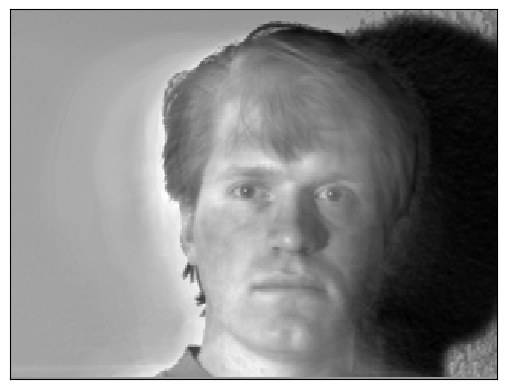

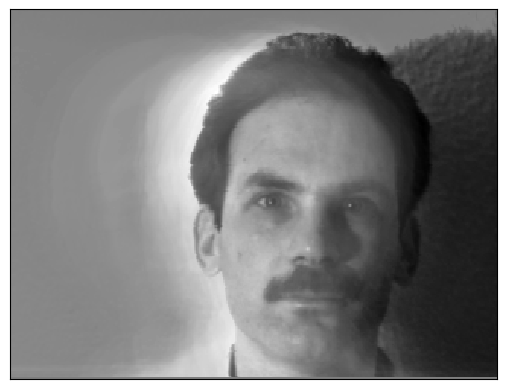

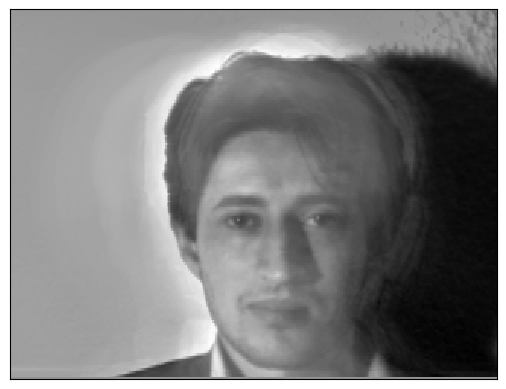

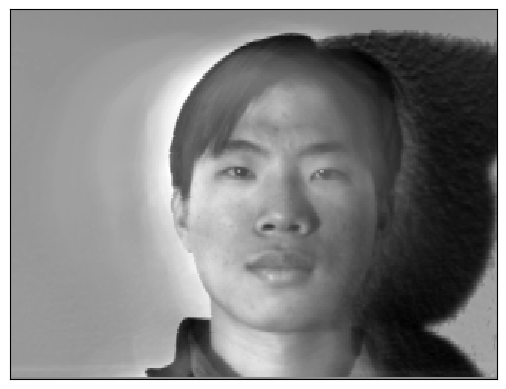

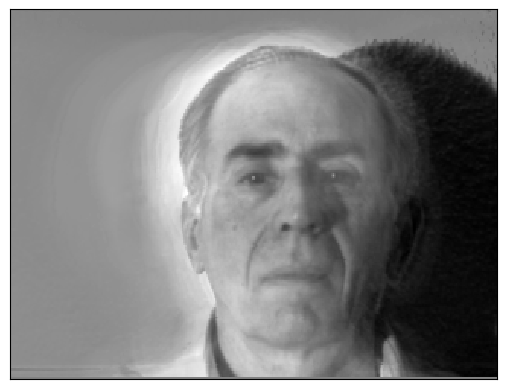

In [40]:
# View 5 pics
for i in range(5):  
    f = plt.figure()
    f1 = plt.imshow(img[i], interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    plt.show()

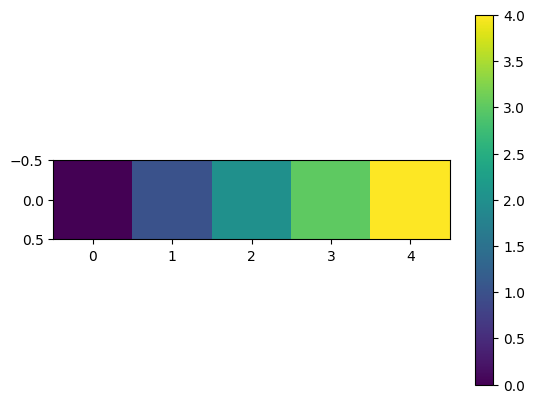

In [41]:
data = np.arange(5).reshape(1, -1)

# Display the array using imshow
plt.imshow(data, interpolation='nearest', cmap='viridis')
plt.colorbar()  # Add a colorbar for reference
plt.show()

In [35]:
img[0].shape

(243, 320)

In [36]:
y_pred = clf.predict(X_5)
print(classification_report(Y_5, y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

